## Importing Libraries :

In [1]:
import zipfile
from PIL import Image, ImageDraw
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

## Face Detction From Newspaper :

Fcae found in file images/001.jpg
In this file faces are not present!
Fcae found in file images/002.jpeg


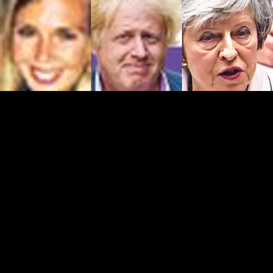

Fcae found in file images/003.JPG
In this file faces are not present!
Fcae found in file images/004.jpg


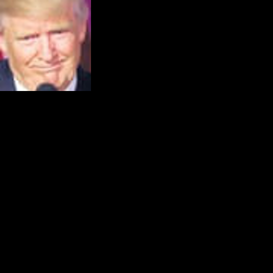

Fcae found in file images/005.jpg
In this file faces are not present!
Fcae found in file images/006.png


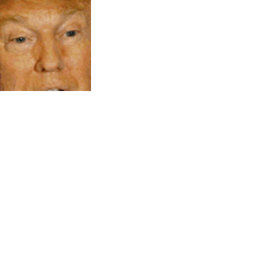

Fcae found in file images/007.png


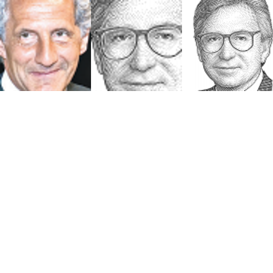

Fcae found in file images/008.png
In this file faces are not present!
Fcae found in file images/009.jpg


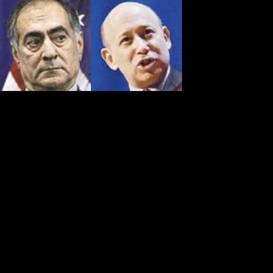

Fcae found in file images/010.jpg


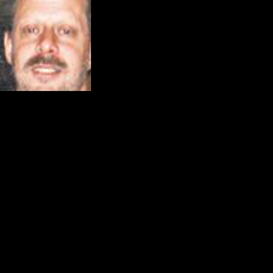

Fcae found in file images/011.jpg
In this file faces are not present!
Fcae found in file images/012.jpg
In this file faces are not present!
Fcae found in file images/013.jpg
In this file faces are not present!
Fcae found in file images/014.jpg


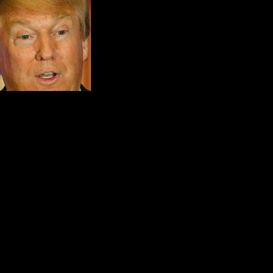

Fcae found in file images/015.jpg


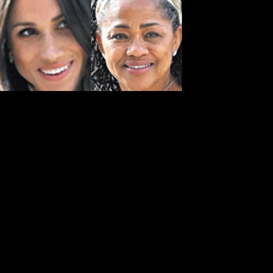

Fcae found in file images/016.jpg
In this file faces are not present!
Fcae found in file images/017.JPG


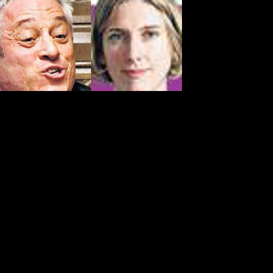

Fcae found in file images/018.jpg


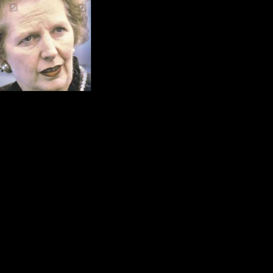

Fcae found in file images/019.PNG


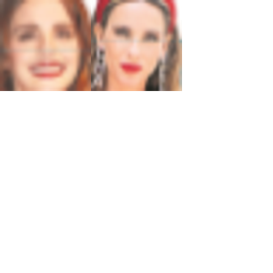

Fcae found in file images/020.jpg


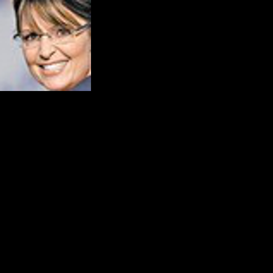

Fcae found in file images/021.jpg


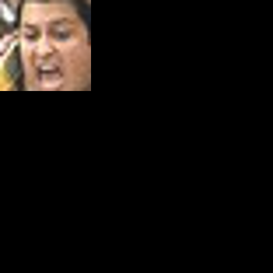

Fcae found in file images/022.jpg


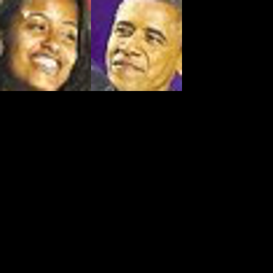

Fcae found in file images/023.jpg


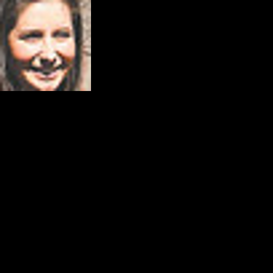

Fcae found in file images/024.jpg
In this file faces are not present!
Fcae found in file images/025.png
In this file faces are not present!
Fcae found in file images/026.jpeg


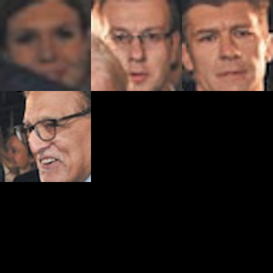

Fcae found in file images/027.png
In this file faces are not present!
Fcae found in file images/028.JPG


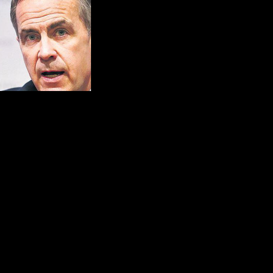

Fcae found in file images/029.jpg
In this file faces are not present!
Fcae found in file images/030.jpg


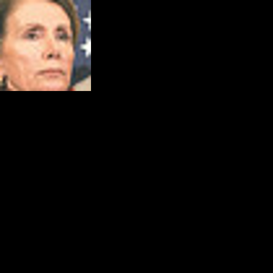

Fcae found in file images/031.jpg
In this file faces are not present!
Fcae found in file images/032.jpg
In this file faces are not present!


In [2]:
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
# reading zip file which contain all newspaper cutting 
zp = zipfile.ZipFile('images_news.zip', 'r')
zp.extractall()
info_lst = zp.infolist() # making a list for information from zipfile
file_names = zp.namelist() # making a name list for all images from zipfile 
# creating a dictionary 
file_dict = {}
for file in file_names:
    img = Image.open(file) # opening a image 
    file_dict[file] = img
    
# defining a function for images to apply face detection 
def contact_sheet(file, file_names):
    lst = []
    img = cv.imread(file)
    file1 = [file_names[0]] # value = 2
    file2 = [file_names[i] for i in [1, 6, 7, 8, 9, 10, 12]] # value = 1.6
    file3 = [file_names[i] for i in [2, 3, 4]] # value = 2.5
    file4 = [file_names[5]] # value = 2.8
    file5 = [file_names[i] for i in [11, 13]] # value = 1.3
    if file in file1:
        faces = face_cascade.detectMultiScale(img, 2)
    elif file in file2:
        faces = face_cascade.detectMultiScale(img, 1.6)
    elif file in file3:
        faces = face_cascade.detectMultiScale(img, 2.5)
    elif file in file4:
        faces = face_cascade.detectMultiScale(img, 2.8)
    else:
        faces = face_cascade.detectMultiScale(img, 1.3)
    print("Fcae found in file {}".format(file))
    try:
        for x,y,w,h in faces:
            img1 = Image.open(file)
            pil_img = img1.crop((x,y,x+w,y+h))
            pil_img = pil_img.resize((182, 182))
            lst.append(pil_img)
         # creating a contact_sheet and filling in those photos
        first_image = lst[0]
        contact_sheet = Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
        x = 0
        y = 0
        for img in lst:
             # paste the current image into the contact sheet
            contact_sheet.paste(img, (x, y) )
            # Now we update our X position.
            # If it is going to be the width of the image, then we set it to 0
            # and update Y as well to point to the next "line" of the contact sheet.
            if (x+first_image.width == contact_sheet.width):
                x = 0
                y = y+first_image.height
            else:
                x = x+first_image.width
        contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
        display(contact_sheet)
    except:
        print("In this file faces are not present!")

for key in file_dict.keys():
    contact_sheet(key, file_names)